Loading Boston Housing Dataset...

Linear Regression Results (Boston Housing - Price vs. Rooms)
Coefficients: [9.34830141]
Intercept: -36.24631889813792
Mean Squared Error: 46.144775347317264
R^2 Score: 0.3707569232254778


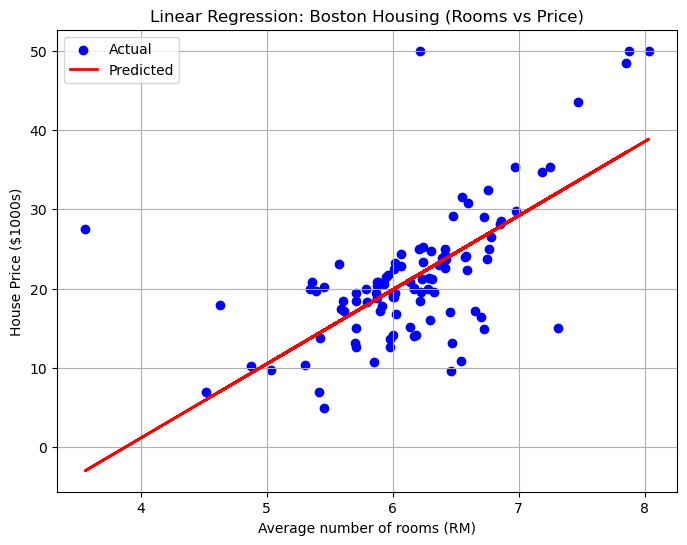


Loading Auto MPG Dataset...

Polynomial Regression Results (Auto MPG - Degree 2)
Mean Squared Error: 18.416967796018056
R^2 Score: 0.639170114701326


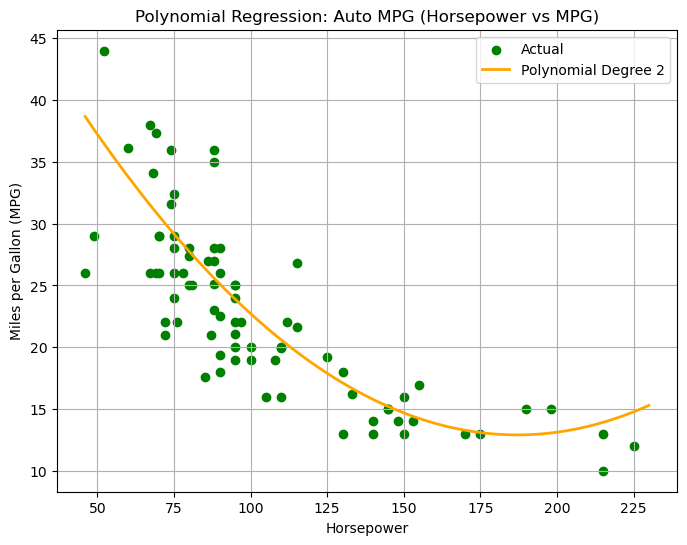

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# Part 1: Linear Regression - Boston Housing
# -------------------------------
print("Loading Boston Housing Dataset...")

# Load dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
X_boston = boston.data
y_boston = boston.target

# We'll use RM (average number of rooms) to predict price
X_rm = X_boston[['RM']]  # average number of rooms
y_price = y_boston

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_rm, y_price, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)
print("\nLinear Regression Results (Boston Housing - Price vs. Rooms)")
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Boston Housing (Rooms vs Price)')
plt.xlabel('Average number of rooms (RM)')
plt.ylabel('House Price ($1000s)')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Part 2: Polynomial Regression - Auto MPG
# -------------------------------
print("\nLoading Auto MPG Dataset...")

# Load dataset
auto_df = sns.load_dataset("mpg").dropna()
auto_df = auto_df[['horsepower', 'mpg']]

# Features and target
X_hp = auto_df[['horsepower']]
y_mpg = auto_df['mpg']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_hp, y_mpg, test_size=0.2, random_state=42)

# Polynomial Regression (degree 2)
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

# Predict and evaluate
y_poly_pred = poly_model.predict(X_test)
print(f"\nPolynomial Regression Results (Auto MPG - Degree {degree})")
print("Mean Squared Error:", mean_squared_error(y_test, y_poly_pred))
print("R^2 Score:", r2_score(y_test, y_poly_pred))

# Plot
X_range = np.linspace(X_hp.min(), X_hp.max(), 100).reshape(-1, 1)
y_range_pred = poly_model.predict(X_range)

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.plot(X_range, y_range_pred, color='orange', linewidth=2, label=f'Polynomial Degree {degree}')
plt.title('Polynomial Regression: Auto MPG (Horsepower vs MPG)')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')
plt.legend()
plt.grid(True)
plt.show()


Linear Regression R² score: 0.5877214395051775


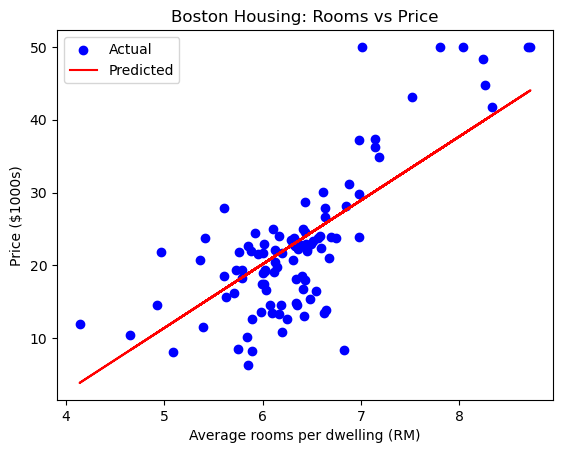

Polynomial Regression R² score: 0.6913464595250469


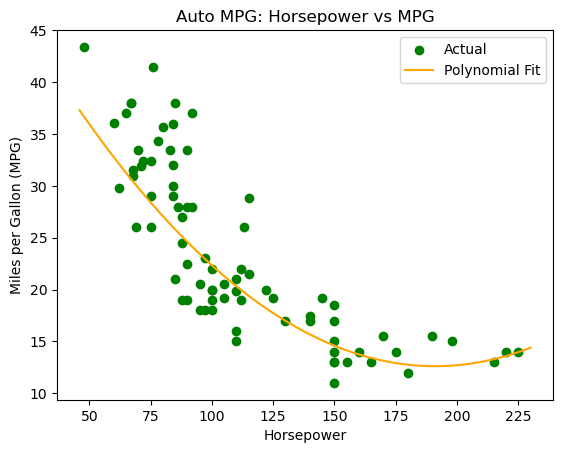

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# ---------------------
# Linear Regression: Boston Housing
# ---------------------
from sklearn.datasets import fetch_openml

# Load data
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data[['RM']]   # Use average number of rooms
y = boston.target         # House price

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Linear Regression R² score:", r2_score(y_test, y_pred))# r2 closer to 1 is better

# Plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Boston Housing: Rooms vs Price')
plt.xlabel('Average rooms per dwelling (RM)')
plt.ylabel('Price ($1000s)')
plt.legend()
plt.show()

# ---------------------
# Polynomial Regression: Auto MPG
# ---------------------
import seaborn as sns

# Load Auto MPG data
df = sns.load_dataset('mpg').dropna()
X = df[['horsepower']]
y = df['mpg']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Polynomial regression model (degree 2)
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(X_train, y_train)

# Predict and evaluate
y_poly_pred = poly_model.predict(X_test)
print("Polynomial Regression R² score:", r2_score(y_test, y_poly_pred))

# Plot
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range = poly_model.predict(X_range)

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.plot(X_range, y_range, color='orange', label='Polynomial Fit')
plt.title('Auto MPG: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')
plt.legend()
plt.show()
